In [1]:
from sklearn import tree
import numpy as np  
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
path = '/Users/rjmac/College/USACTIVITYAndDETAILS/Stevens_Study_Material/Sem2_2017/KDDM/Final_Project/HR_comma_sep.csv'
data2 = pd.read_csv(path, header=None, names=["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years","left"])
data2.head()

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
1,0.38,0.53,2,157,3,0,0,1
2,0.8,0.86,5,262,6,0,0,1
3,0.11,0.88,7,272,4,0,0,1
4,0.72,0.87,5,223,5,0,0,1


In [2]:
data2.iloc[1:].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
1,0.38,0.53,2,157,3,0,0,1
2,0.8,0.86,5,262,6,0,0,1
3,0.11,0.88,7,272,4,0,0,1
4,0.72,0.87,5,223,5,0,0,1
5,0.37,0.52,2,159,3,0,0,1


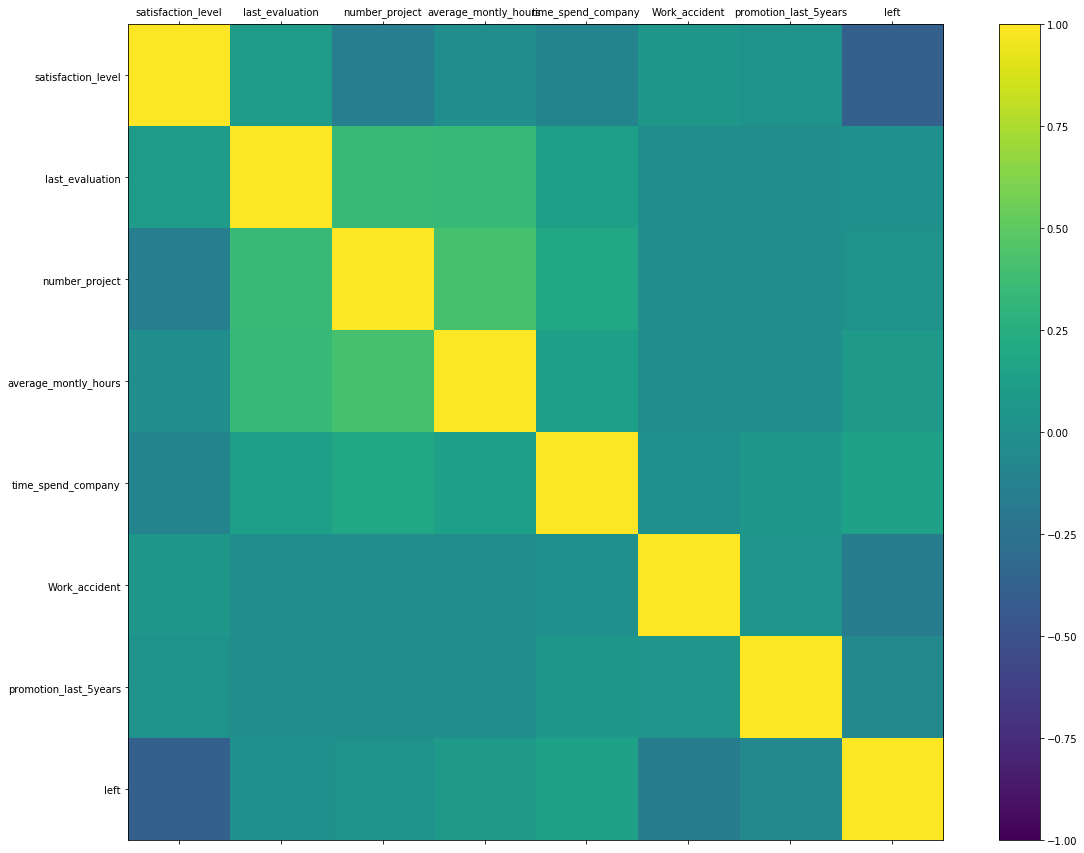

In [3]:
data2 = data2.iloc[1:]
data2 = data2.astype(float)
column_names = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','Work_accident','promotion_last_5years','left']
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cax = ax.matshow(data2.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(column_names)
ax.set_yticklabels(column_names)
plt.show()

In [4]:
data2.head()
training_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','Work_accident','promotion_last_5years']
target = 'left'
train_x, test_x, train_y, test_y = train_test_split(data2[training_features], data2[target], train_size=0.7)
train_x.shape

(10499, 7)

In [5]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
from sklearn.metrics import accuracy_score
train_pred = clf.predict(train_x)
accuracy_score(train_y,train_pred)*100

95.999619011334417

In [8]:
test_pred = clf.predict(test_x)
accuracy_score(test_y, test_pred)*100

95.911111111111111